In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import os
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read data 

In [2]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json'
start_from = '2020-02-20'

response = requests.get(url)
my_data = response.json()
df = pd.DataFrame.from_dict(my_data)
df['data'] = [x.split()[0] for x in df['data']]

# start from selected day
d = (df['data'] == start_from).idxmax()
df = df.iloc[d:, :]

tamponi = df.tamponi
tamponi_per_day = np.insert(np.diff(tamponi), 0, 0, axis=0)

nuovi_positivi = df.nuovi_positivi
detection_rate = nuovi_positivi/tamponi_per_day

t = pd.to_datetime(df.data)

# Plot 

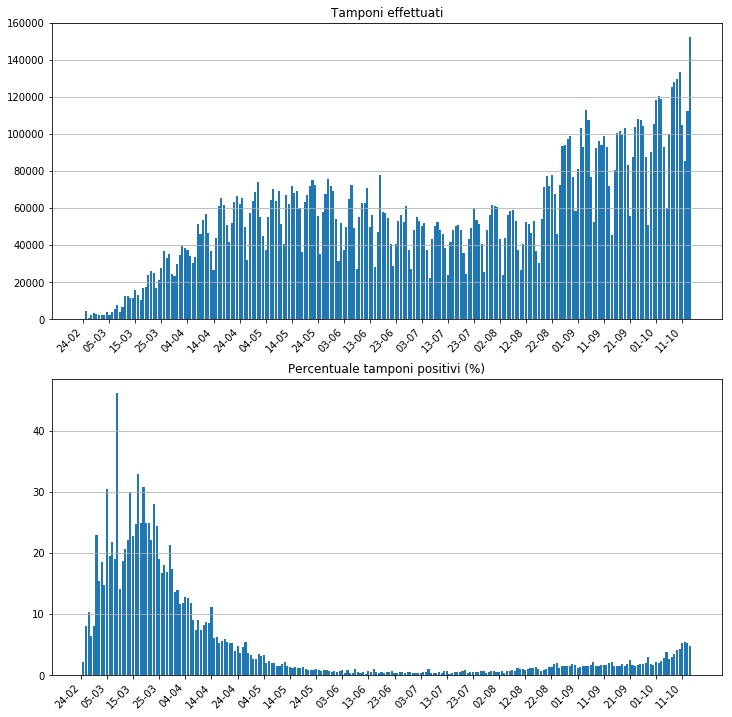

In [3]:
fig, ax = plt.subplots(2,1,figsize=[12,12])

ax[0].bar(t, tamponi_per_day)
ax[0].set_title('Tamponi effettuati')

ax[1].bar(t, detection_rate*100)
ax[1].set_title('Percentuale tamponi positivi (%)')

for a in ax:
    a.set_xticks(t[0:-1:10]);
    a.xaxis.set_major_formatter(DateFormatter("%d-%m"))
    a.grid(axis='y')
    plt.setp(a.get_xticklabels(), rotation=45, ha='right')

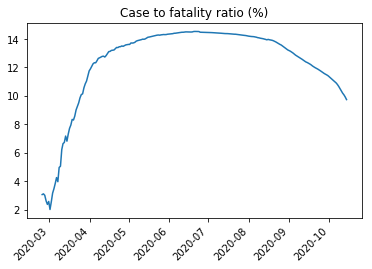